### Part - 1:
### Laplace Smoothing:

#### In Naive Bayes classification, we find out how likely a feature (like a word) is to be in a class (like “good” or “bad”). But if a word from the test data isn’t in the training data for a certain class, its probability goes to zero, which leads to the problem of Multiplying by zero, which makes the whole thing go to zero, which means we get the wrong answer.

#### To overcome this problem, we use "Laplace smoothing" also known as add-one smoothing. We act like we have seen each word at least once, even if it didn’t appear in the training data. The formula for estimating a word’s probability with Laplace smoothing is:

#### -> 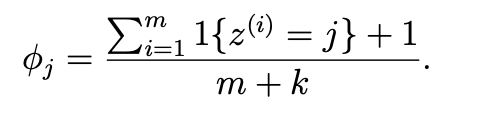
####  Explanation of the Formula:

- \( phi_j \) represents the **smoothed probability** for class \( j \).
- \( m \) is the **total number of instances** in the dataset.
- \( k \) is the **number of possible classes**.
- \( z^{(i)} \) is the **label** of the \( i \)-th training example.

#### -> P(word/class)= (Count of word in class+1)/(Total words in class+V)
####    Here, +1 is the smoothing factor, and V is the vocabulary size.

### Example:
### Suppose we have a small dataset with the following word counts for two classes:

#### Positive class:
##### "good": 3
##### "bad": 0
#### Negative class:
##### "good": 0
##### "bad": 2
#### The vocabulary size (V) is 2 because the only words are "good" and "bad".

### Without Laplace Smoothing:

##### P("good" | positive) = 3 / 3 = 1
##### P("bad" | positive) = 0 / 3 = 0
##### P("good" | negative) = 0 / 2 = 0
##### P("bad" | negative) = 2 / 2 = 1
##### The probability becomes zero if the test data contains "bad" for the positive class or "good" for the negative class.

### With Laplace Smoothing:

##### P("good" | positive) = (3 + 1) / (3 + 2) = 4 / 5 = 0.8
##### P("bad" | positive) = (0 + 1) / (3 + 2) = 1 / 5 = 0.2
##### P("good" | negative) = (0 + 1) / (2 + 2) = 1 / 4 = 0.25
##### P("bad" | negative) = (2 + 1) / (2 + 2) = 3 / 4 = 0.75
##### Now, no probabilities are zero, and the model can handle unseen words more effectively.
​	
 
    


# Naive Bayes Classifier

 1) Use sklearn NB on continuous data   
 
 2) Code Gaussian NB on countinous data
 
 3) Use sklearn NB on textual data

 ### 1) Use sklearn NB on continuous data 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
data = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
data["label"] = cancer["target"]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
data = data[["mean radius", 
             "mean texture", 
             "mean perimeter", 
             "mean area", 
             "mean smoothness",
             "label"]]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,label
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [7]:
data["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

---
To handle imbalanced data set, we can use oversampling, undersampling, or SMOTE

https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf

https://towardsdatascience.com/smote-fdce2f605729

---

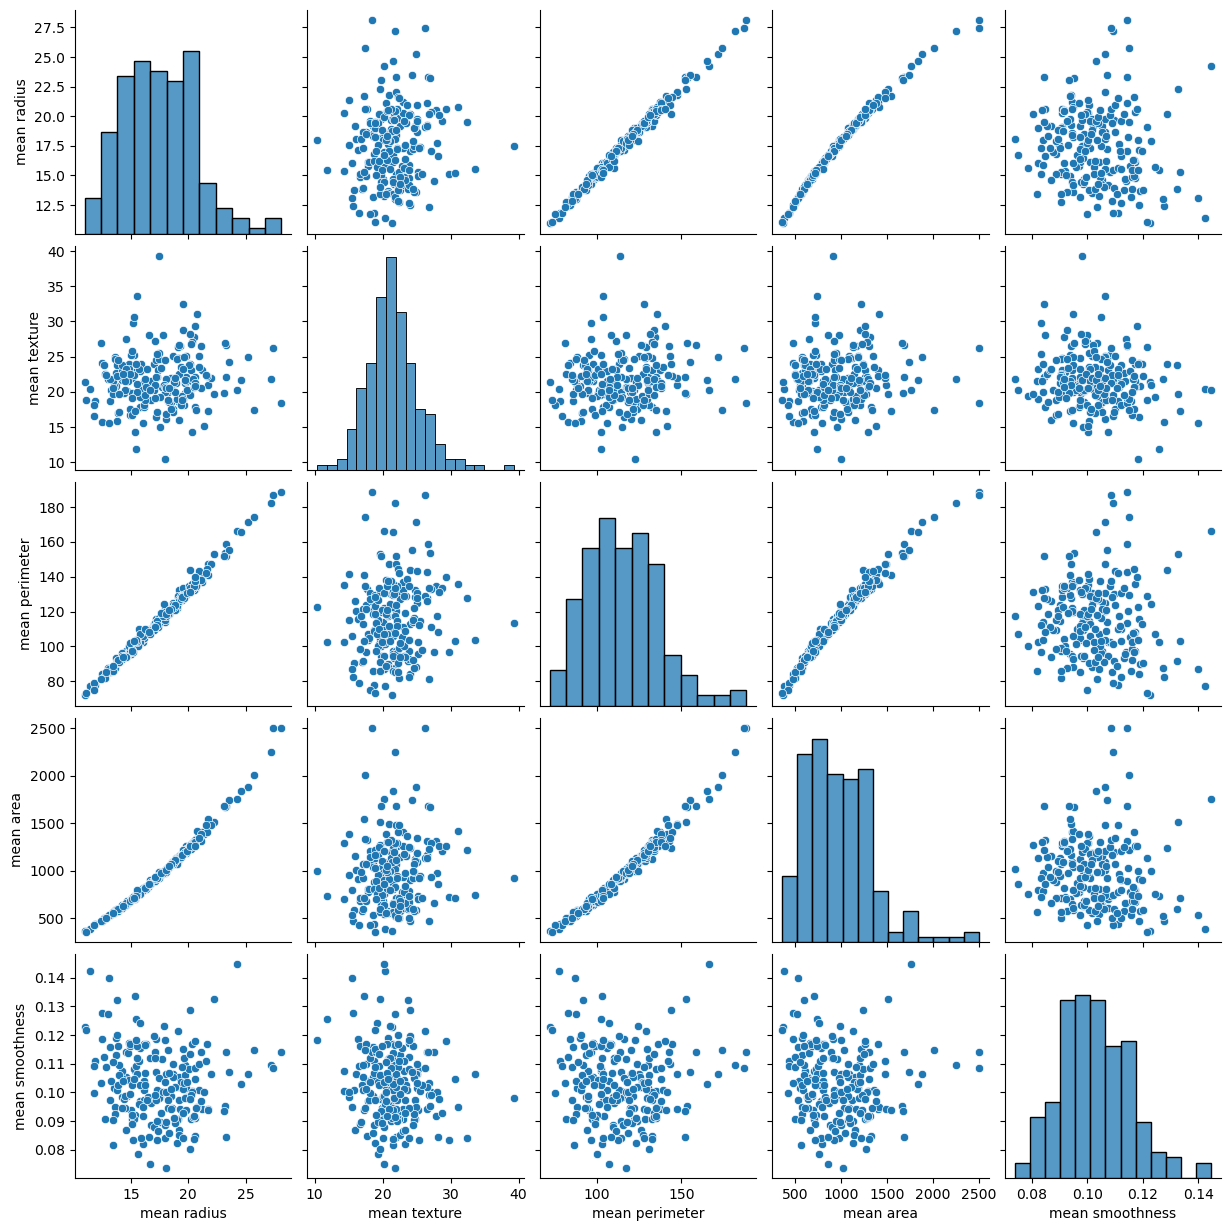

In [9]:
sns.pairplot(data[data.label==0].iloc[:,:-1]);

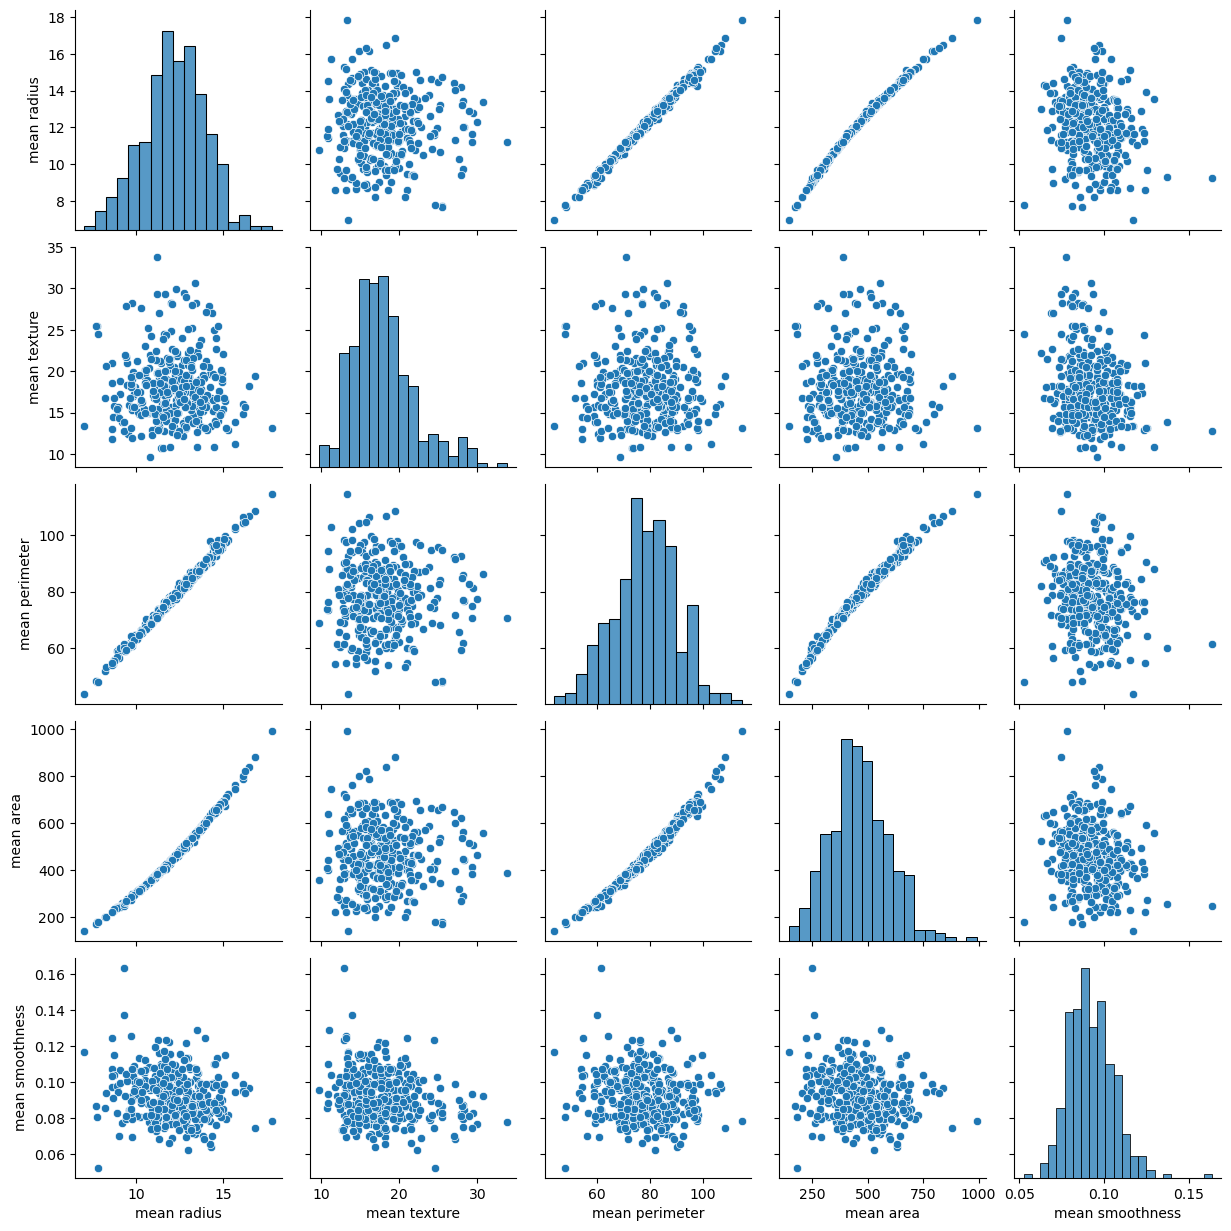

In [10]:
sns.pairplot(data[data.label==1].iloc[:,:-1]);

In [11]:
data = data[["mean radius", "mean texture", "mean smoothness", "label"]]
data.head()

,mean radius,mean texture,mean smoothness,label
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


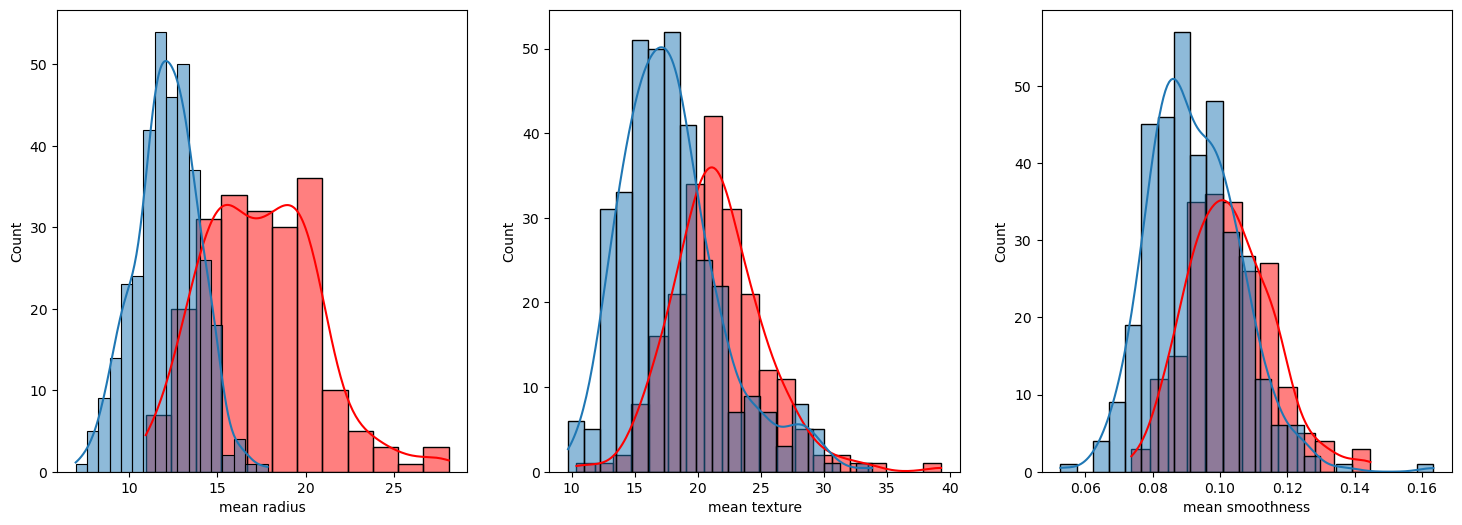

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data[data.label==0], ax=axes[0], x="mean radius", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[0], x="mean radius", kde=True)

sns.histplot(data[data.label==0], ax=axes[1], x="mean texture", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[1], x="mean texture", kde=True);

sns.histplot(data[data.label==0], ax=axes[2], x="mean smoothness", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[2], x="mean smoothness", kde=True);

In [13]:
X = data.drop(columns=["label"])
y = data["label"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  4]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



 ## 2) Code Gaussian NB on countinous data

In [19]:
# Find P(y) -- PRIOR

def find_prior(df, y):
    classes = sorted((df[y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[y]==i])/len(df))
    return prior

In [20]:
sorted(data["label"].unique())

[0, 1]

In [21]:
len(data[data["label"]==0])

212

In [22]:
find_prior(data, "label")

[0.37258347978910367, 0.6274165202108963]

In [23]:
# Find P(x|y)  -- LIKELIHOOD

def find_likelihood_gaussian(df, feature_name, feature_value, y, label):
    df = df[df[y]==label]
    mean = df[feature_name].mean()
    std = df[feature_name].std()
    P_x_given_y = (1/np.sqrt(2*np.pi)*std) * np.exp(-((feature_value-mean)**2 /(2*std**2)))
    return P_x_given_y

In [24]:
# Find P(x1|y) * P(x2|y) * ... * P(xd|y) * P(y) -- NUMERATOR IN THE POSTERIOR

# Find y for which the above quantity is max

def My_NBGaussian(df, X_test, y):
    
    # Get feature names
    features = list(df.columns)[:-1]

    # Find prior
    prior = find_prior(df, y)

    y_pred = []
    
    # Loop over the entire training data set
    for x in X_test:
        # Find likelihood
        labels = sorted(list(df[y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= find_likelihood_gaussian(df, features[i], x[i], y, labels[j])

        # Find posterior (numerator only) for each label
        posterior = [1]*len(labels)
        for j in range(len(labels)):
            posterior[j] = likelihood[j] * prior[j]
        
        # Find y for which the posterior is max
        y_pred.append(np.argmax(posterior))

    return np.array(y_pred) 

In [25]:
[1]*3

[1, 1, 1]

In [26]:
train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:,:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()

y_pred = My_NBGaussian(train, X_test, "label")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  0]
 [ 5 69]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.93      0.97        74

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



###  3) Use sklearn NB on textual data

In [28]:
url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
dataset = pd.read_csv(url, delimiter='\t')
dataset

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
651,ham,Anything lor. Juz both of us lor.
652,ham,Get me out of this dump heap. My mom decided t...
653,ham,Ok lor... Sony ericsson salesman... I ask shuh...
654,ham,Ard 6 like dat lor.


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     656 non-null    object
 1   Message  656 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


In [30]:
counts = dataset['Type'].value_counts()
counts

Type
ham     577
spam     79
Name: count, dtype: int64

### Data Visualization

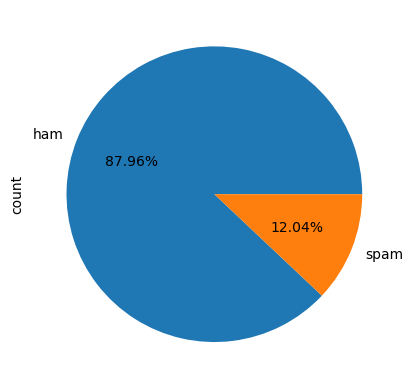

In [32]:
counts.plot(kind='pie', autopct='%.2f%%'); 

---

Let’s plot the histogram of messages with respect to the number of words they contain.

---

In [34]:
dataset['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [35]:
print(dataset['Message'][0].split())

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [36]:
len(dataset['Message'][0].split())

20

---

Tokenization, removing punctuation, removing stop words, removing numbers, making all words lower case, 
stemming/lemmatization

---

In [38]:
# The following script creates a list that contains a number of words in ham messages

dataset_ham = dataset[dataset['Type'] == "ham"]
dataset_ham_count = dataset_ham['Message'].str.split().str.len()
dataset_ham_count       

# dispays the index of the message in the data set and the number of words it contains

0      20
1       6
3      11
4      13
6      16
       ..
651     7
652    15
653    18
654     5
655    15
Name: Message, Length: 577, dtype: int64

In [39]:
dataset_spam = dataset[dataset['Type'] == "spam"]
dataset_spam_count = dataset_spam['Message'].str.split().str.len()
dataset_spam_count

2      28
5      32
8      26
9      29
11     26
       ..
615    25
617    18
628    16
631    33
638    28
Name: Message, Length: 79, dtype: int64

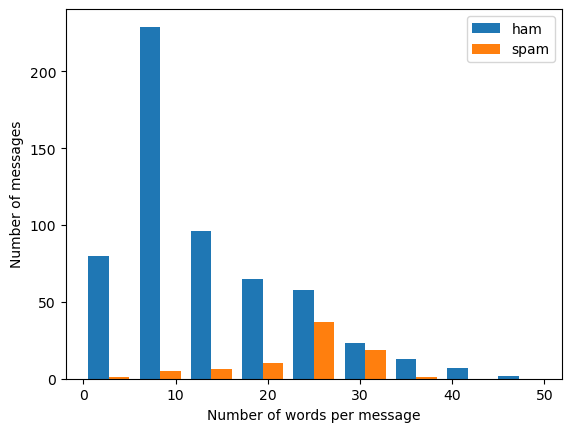

In [40]:
plt.hist([dataset_ham_count, dataset_spam_count], 
         bins = np.linspace(0, 50, 10), 
         label = ['ham', 'spam'])
plt.xlabel('Number of words per message')
plt.ylabel('Number of messages')
plt.legend();

----

Let's create a word cloud to see which message is spam and which is not

We need to have text to plot this, so we will combine all the words from all spam messages together

---

In [42]:
! pip install wordcloud

from wordcloud import WordCloud

spam_words = ''

for message in dataset_spam["Message"]:
     text = message.lower()
     tokens = text.split()
     for words in tokens:
         spam_words = spam_words + words + ' '
        
spam_words 

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our £100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 500 new mobiles from 2004, must go! txt: nokia to no: 89545 & collect yours today!fr

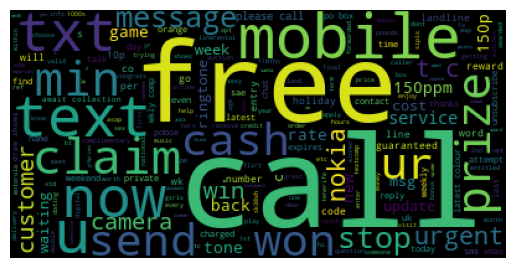

In [43]:
spam_wordcloud = WordCloud().generate(spam_words)

plt.imshow(spam_wordcloud)
plt.axis("off");

### Create a NB classifier

In [45]:
X = dataset["Message"]  
 
y = dataset["Type"]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

X = vect.fit_transform(X)

X

<656x2551 sparse matrix of type '<class 'numpy.int64'>'
	with 8542 stored elements in Compressed Sparse Row format>

In [47]:
656*2551

1673456

In [48]:
8542/1673456

0.005104406688912048

In [49]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [50]:
pd.DataFrame(X.todense(), 
             columns=vect.get_feature_names_out(), 
             index=dataset['Message'])

,000,008704050406,0121,01223585334,02,0207,02073162414,03,04,06,...,yun,yuo,yup,zaher,zed,zindgi,zogtorius,zyada,èn,〨ud
Message,,,,,,,,,,,,,,,,,,,,,
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Nah I don't think he goes to usf, he lives around here though",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anything lor. Juz both of us lor.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Get me out of this dump heap. My mom decided to come to lowes. BORING.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [53]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 

[[170   5]
 [  2  20]]
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       175
        spam       0.80      0.91      0.85        22

    accuracy                           0.96       197
   macro avg       0.89      0.94      0.92       197
weighted avg       0.97      0.96      0.97       197



In [54]:
new_messages = [
    "Congratulations! Check out your prize at http://hguyfuyfougtouit.com",
    "Hi professor, can you replace my midterm with the final exam?"
]
vect_messages = vect.transform(new_messages)
model.predict(vect_messages)

array(['spam', 'ham'], dtype='<U4')

### HW8

### Part II: Build a Naıve Bayes algorithm on the titanic data set attached to OneDrive to predict whether a passenger survived or not.

This data set provides information on the fate of passengers on the fatal maiden voyage of the
ocean liner ”Titanic”, summarized according to survival (target variable with 1=survived and
0=died) and explanatory variables: Name, Pclass (passenger class), Sex, Age, SibSp (total
number of siblings including the spouse traveling with the passenger), Parch (total number
of parents and children traveling with the passenger), Ticket, Fare, Cabin, and Embarked
(where the traveler mounted from: Southampton, Cherbourg, or Queenstown).

In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, CategoricalNB

from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [57]:
# 1. Import the data set into pandas data frame
df = fetch_openml("titanic", version=1, as_frame=True).frame[['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']]
print(df.info())
df['survived'] = pd.to_numeric(df['survived'])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  1309 non-null   category
 1   name      1309 non-null   object  
 2   pclass    1309 non-null   int64   
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   cabin     295 non-null    object  
 10  embarked  1307 non-null   category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 86.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  1309 non-null   int64   
 1   name      1309 non-null   object  
 2   pclass    1309 non-n

,survived,name,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,2665,14.4542,NaN,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,2665,14.4542,NaN,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,2656,7.2250,NaN,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,2670,7.2250,NaN,C


In [58]:
# 2. Split data into training and test sets
X, y = df.drop(columns=['survived']), df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

      pclass     sex   age  sibsp  parch     fare embarked
907        3  female  20.0      1      0   9.8250        S
761        3    male  16.0      0      0   9.5000        S
393        2    male  25.0      0      0  31.5000        S
532        2    male  41.0      0      0  13.0000        S
717        3    male  18.0      1      0  14.4542        C
...      ...     ...   ...    ...    ...      ...      ...
407        2  female  29.0      1      0  26.0000        S
243        1    male  46.0      0      0  79.2000        C
321        1    male  62.0      0      0  26.5500        S
1104       3    male  16.0      4      1  39.6875        S
931        3    male   NaN      0      0   7.7375        Q

[1047 rows x 7 columns]       pclass     sex   age  sibsp  parch      fare embarked
79         1  female  55.0      2      0   25.7000        S
967        3  female  45.0      0      0    7.7500        S
861        3  female  23.0      0      0    7.9250        S
902        3    male   NaN 

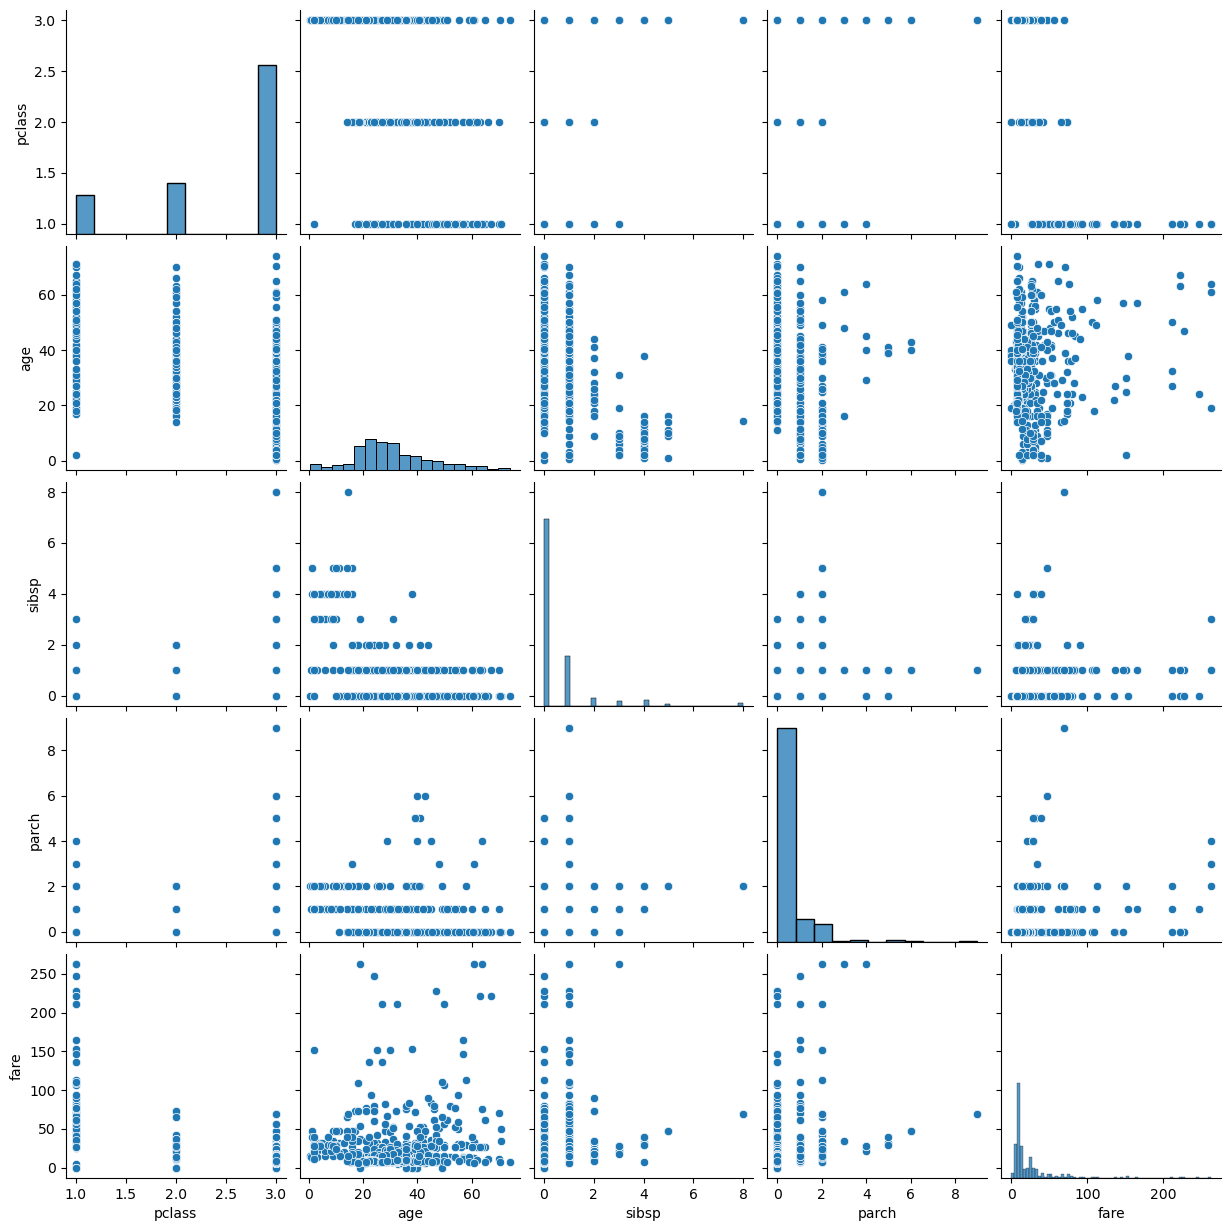

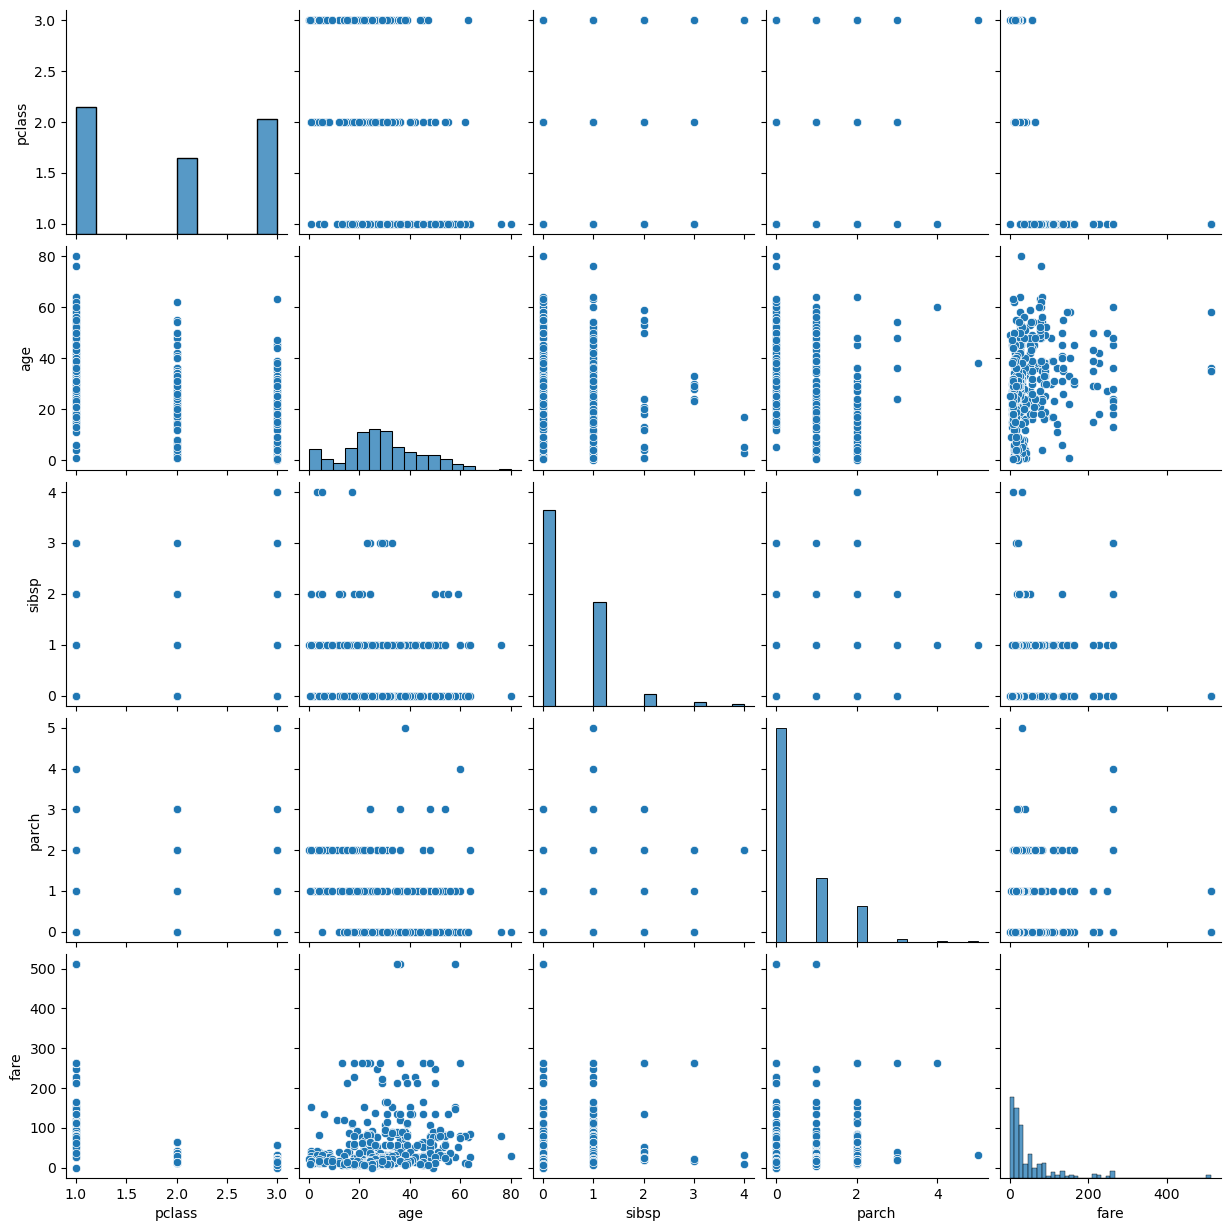

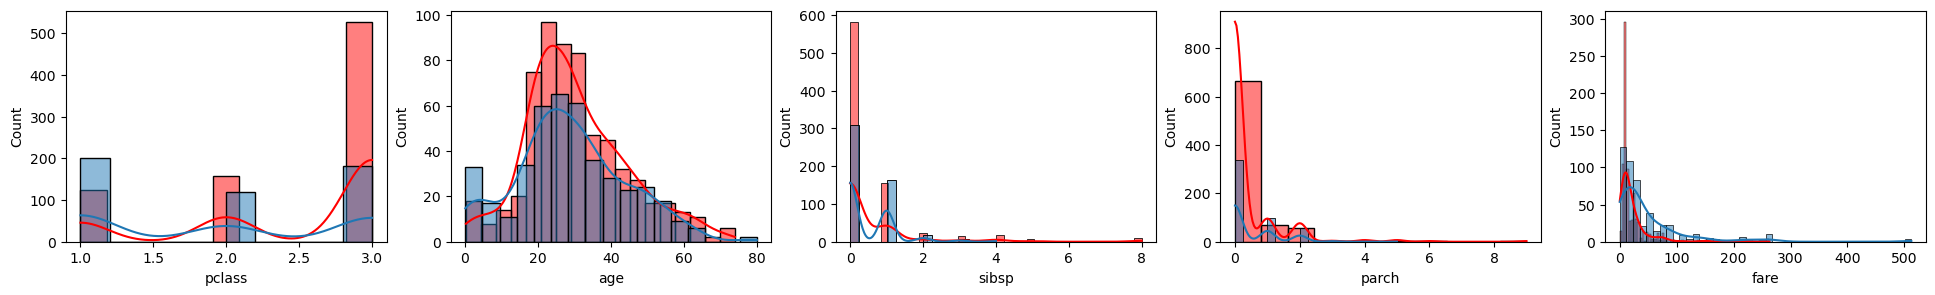

In [59]:
# 3. Select one or more explanatory variables you would like to use
sns.pairplot(df[df.survived==0].iloc[:, 1:]) 
sns.pairplot(df[df.survived==1].iloc[:, 1:])

fig, axes = plt.subplots(1, 5, figsize=(24, 3))

sns.histplot(df[df.survived==0], ax=axes[0], x='pclass', kde=True, color="r")
sns.histplot(df[df.survived==1], ax=axes[0], x='pclass', kde=True)

sns.histplot(df[df.survived==0], ax=axes[1], x='age', kde=True, color="r")
sns.histplot(df[df.survived==1], ax=axes[1], x='age', kde=True)

sns.histplot(df[df.survived==0], ax=axes[2], x='sibsp', kde=True, color="r")
sns.histplot(df[df.survived==1], ax=axes[2], x='sibsp', kde=True)

sns.histplot(df[df.survived==0], ax=axes[3], x='parch', kde=True, color="r")
sns.histplot(df[df.survived==1], ax=axes[3], x='parch', kde=True)

sns.histplot(df[df.survived==0], ax=axes[4], x='fare', kde=True, color="r")
sns.histplot(df[df.survived==1], ax=axes[4], x='fare', kde=True)

columns = ['name', 'ticket', 'cabin'] # not useful
X_train, X_test = X_train.drop(columns=columns), X_test.drop(columns=columns)
print(X_train,X_test)

In [60]:
# 4. Fill in missing values
print(X_train.info())

age_imputer, fare_imputer = SimpleImputer(strategy='mean'), SimpleImputer(strategy='mean')
embarked_imputer = SimpleImputer(strategy='most_frequent')

X_train['age'] = age_imputer.fit_transform(X_train[['age']])
X_train['fare'] = fare_imputer.fit_transform(X_train[['fare']])
X_train['embarked'] = embarked_imputer.fit_transform(X_train[['embarked']]).ravel()

X_test['age'] = age_imputer.transform(X_test[['age']])
X_test['fare'] = fare_imputer.transform(X_test[['fare']])
X_test['embarked'] = embarked_imputer.transform(X_test[['embarked']]).ravel()

print(f'\n{X_train.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 907 to 931
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1047 non-null   int64   
 1   sex       1047 non-null   category
 2   age       838 non-null    float64 
 3   sibsp     1047 non-null   int64   
 4   parch     1047 non-null   int64   
 5   fare      1046 non-null   float64 
 6   embarked  1045 non-null   category
dtypes: category(2), float64(2), int64(3)
memory usage: 51.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 907 to 931
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1047 non-null   int64   
 1   sex       1047 non-null   category
 2   age       1047 non-null   float64 
 3   sibsp     1047 non-null   int64   
 4   parch     1047 non-null   int64   
 5   fare      1047 non-null   float64 
 6   embarked  1047 non-null   object  
dtypes:

In [61]:
# 5. Convert categorical variables to numerical
print(X_train.info())

sex_encoder, embarked_encoder = LabelEncoder(), LabelEncoder()

X_train['sex'] = sex_encoder.fit_transform(X_train[['sex']].values.ravel())
X_train['embarked'] = embarked_encoder.fit_transform(X_train[['embarked']].values.ravel())

X_test['sex'] = sex_encoder.transform(X_test[['sex']].values.ravel())
X_test['embarked'] = embarked_encoder.transform(X_test[['embarked']].values.ravel())

print(f'\n{X_train.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 907 to 931
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1047 non-null   int64   
 1   sex       1047 non-null   category
 2   age       1047 non-null   float64 
 3   sibsp     1047 non-null   int64   
 4   parch     1047 non-null   int64   
 5   fare      1047 non-null   float64 
 6   embarked  1047 non-null   object  
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 58.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 907 to 931
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   int64  
 2   age       1047 non-null   float64
 3   sibsp     1047 non-null   int64  
 4   parch     1047 non-null   int64  
 5   fare      1047 non-null   float64
 6   embarked  1047 non-null   int64  
dtyp

In [62]:
# 6. Build a model 
columns = ['age', 'fare']
X_train_continuous, X_train_categorical = X_train[columns], X_train.drop(columns=columns)
X_test_continuous, X_test_categorical = X_test[columns], X_test.drop(columns=columns)

continuous_model = GaussianNB().fit(X_train_continuous, y_train)
categorical_model = CategoricalNB().fit(X_train_categorical, y_train)

In [132]:
# 7. Inspect evaluation measures
print(f'{"-"*20}Training Dataset{"-"*20}')
log_prob_continuous = continuous_model.predict_log_proba(X_train_continuous)
log_prob_categorical = categorical_model.predict_log_proba(X_train_categorical)
y_pred = np.argmax(log_prob_continuous + log_prob_categorical, -1)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

print(f'{"-"*20}Testing Dataset{"-"*20}')
log_prob_continuous = continuous_model.predict_log_proba(X_test_continuous)
log_prob_categorical = categorical_model.predict_log_proba(X_test_categorical)
y_pred = np.argmax(log_prob_continuous + log_prob_categorical, -1)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--------------------Training Dataset--------------------
[[584  48]
 [218 197]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       632
           1       0.80      0.47      0.60       415

    accuracy                           0.75      1047
   macro avg       0.77      0.70      0.71      1047
weighted avg       0.76      0.75      0.73      1047

--------------------Testing Dataset--------------------
[[161  16]
 [ 49  36]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       177
           1       0.69      0.42      0.53        85

    accuracy                           0.75       262
   macro avg       0.73      0.67      0.68       262
weighted avg       0.74      0.75      0.73       262



In [128]:
print(log_prob_continuous.shape)

(262, 2)


In [64]:
# 8. Use model to predict
new_df = X_test.copy()
new_df['Survived'] = y_test
new_df['Predicted Survived'] = y_pred
new_df

,pclass,sex,age,sibsp,parch,fare,embarked,Survived,Predicted Survived
79,1,0,55.000000,2,0,25.7000,2,1,1
967,3,0,45.000000,0,0,7.7500,2,0,0
861,3,0,23.000000,0,0,7.9250,2,0,0
902,3,1,29.905032,1,2,23.4500,2,0,0
1058,3,0,29.000000,0,0,7.9250,2,0,0
...,...,...,...,...,...,...,...,...,...
544,2,1,34.000000,1,0,21.0000,2,0,0
709,3,0,16.000000,0,0,7.7500,1,1,0
781,3,1,33.000000,0,0,7.8958,0,0,0
294,1,1,49.000000,1,1,110.8833,0,0,1
